In [1]:
# Import necessary Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Import Dataset

url = "http://bit.ly/w-data"

data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Perform EDA on this dataset

# Plot Histogram in Hours and scores

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

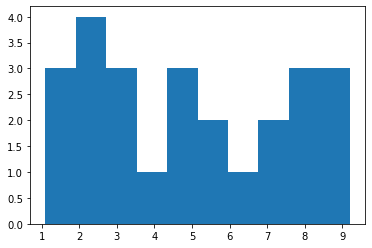

In [5]:
plt.hist(data['Hours'])

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

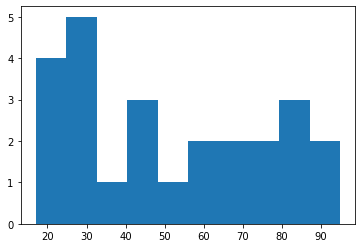

In [6]:
plt.hist(data['Scores'])

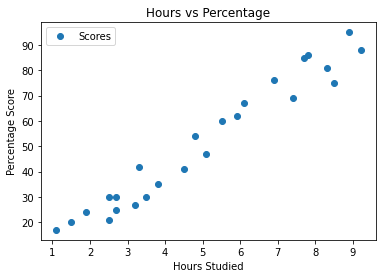

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

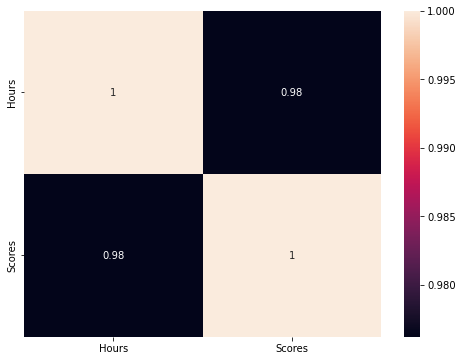

In [8]:
# now, plot the dataset

plt.figure(figsize=(8,6))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [10]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state=1)

# print the data
x_train

array([[3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [11]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (17, 1)
x_test:  (8, 1)
y_train:  (17,)
y_test:  (8,)


In [12]:
# Model selection and implimentation (logistic regression`)

from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [14]:
pred = reg.predict(x_test)
pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [15]:
# Comperision between Actual and predicted value

comp = pd.DataFrame({"Actual": y_test, "Predicted": pred})
comp

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [16]:
# Now, test with our own data

hours = [[9.25]]
own_pred = reg.predict(hours)

print("Total Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Total Hours = [[9.25]]
Predicted Score = 94.78722212956563


In [17]:
# Evaluate the model

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 7.169048271425507
